
<span style=" font-size:3em;">MOD510 22H| Mandatory Project 3| Stirrred (not shaken)</span>

<span style=" font-size:1.5em;">Andreas Nonslid Håvardsen | Daniel Fylling | Sahar Kadkhodamasoum Ali</span>  

# Abstract
This project explores the possibility of using a set of **Ordinary Differential Equations (ODEs)** instead of doing a complicated 3D **Computational Fluid Dynamic (CFD)** simulation. In this project, the case study is the circulatory system of the human body. This case study is motivated by the idea of wanting to simulate all the body vessels in a human body, in a less computationally expensive way, since it is exhausting work. Especially when considering the fact that, a solution for one circulatory system is not applicable for others since the vein map of a human body is unique. It is the same as connections of the pores in an oil reservoir. We can model a connection between two pores or more with CDF but doing this task in scale of an oil reservoir is impossible. These examples show that even if we know all the physical laws governing the problems, it can be impossible to solve them in full scale. In this situation, ODE comes to help in modeling.
In this project, in the way of achieving this goal, mixing tank model is used for simulating the changes in the shape of a medical tracer after traveling in an aorta arch and three algorithms which are Euler, Runge-Kutta (second and fourth order) are used as solvers. 
Then the result of ODE models and CFD simulation are compared to figure out some information about flooding rate and volume of aorta arch by tunning the models. 
Lastly, since detection for the aneurysm in the aorta with a basic model is not possible (which is shown later in this report), a extended model is implementing for this purpose ([1](#ref)).

# Introduction

"In this project, we are going to predict the effluent concentration of a simple model with n-tanks in a series and match them with CFD solvers which is the experimental lab". For this purpose, we use a simple approach which is the Continues-Stirred-Tank-Reactor (CSTR) model with n-tanks in series. 
Although matching the concentration inside of the tank is not possible in this model, a simple and correct model can help in determining important parameters.

Based on the law of conservation of mass([2](#ref)):

In a series of n-tanks, the mass change per time is given by equation([1](#eq1)) :


$$
\begin{equation}
[Change\; of\; mass\;in\;the\;system]/time = [mass\;in]/time - [mass\;out]/time
\tag{1}
\end{equation}
$$


So:

$$ V_0 \:\frac{dC_0}{dt}=q\:(C_in-C_0)
$$


$$ V_1 \:\frac{dC_1}{dt}=q\:(C_0-C_1)$$
$$.$$ 
$$.$$
$$.$$

$$ 
\begin{equation}
V_{n-1} \:\frac{dC_{n-1}}{dt}=q\:(C_{n-2}-C_{n-1})
\tag{2}
\end{equation}
$$

It should be mentioned that $V_i$ is the volume of tank number i and it is assumed that volume of tanks are equal, which means that:

$$
\begin{equation}
V_i=\frac{V_{Tot}}{n}
\tag{3}
\end{equation}$$

Since $\tau=\frac{V_{Tot}}{q}$, equation([2](#eq)) will be converted to equation ([4](#eq)) :


$$ V_0 \:\frac{dC_0}{dt}=\frac{n}{\tau}\:(C_in-C_0)$$

$$ V_1 \:\frac{dC_1}{dt}=\frac{n}{\tau}\:(C_0-C_1)$$
$$.$$ 
$$.$$
$$.$$

$$ 
\begin{equation}
V_{n-1} \:\frac{dC_{n-1}}{dt}=\frac{n}{\tau}\:(C_{n-2}-C_{n-1})
\tag{4}
\end{equation}
$$                                                     

Solution for the condition of C_0(0)=1, C_i(0)=0 for i>1 is equal to equations ([5](#eq)), ([6](#eq)) and ([7](#eq)):

For n=1 ⟶ 
$$
\begin{equation}
C_0(t)=exp(-\frac{t}{\tau})
\tag{5}
\end{equation}
$$
For n=2 ⟶
$$
\begin{equation}
C_1(t)=\frac{2t}{\tau}\;exp(-\frac{t}{\tau})
\tag{6}
\end{equation}
$$
For n=3 ⟶
$$
\begin{equation}
C_2(t)=\frac{9t^2}{2\tau^2}\;exp(-\frac{t}{\tau})
\tag{7}
\end{equation}
$$



false starting point
Curve fits best at tau = 2.415


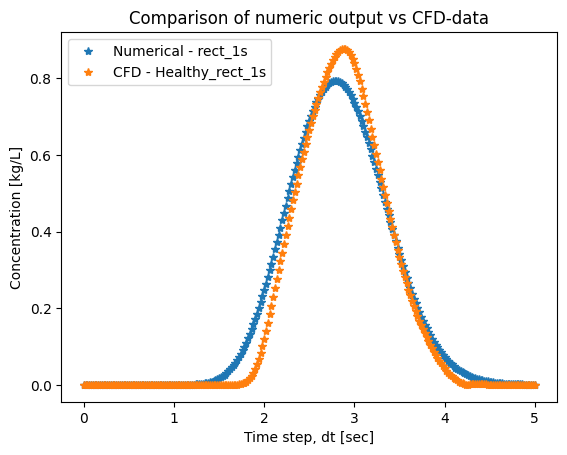

In [1]:
from Stirred import Stirred
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]

## Excersies 1: Write your own ODE solver

### Part 1
In this exercise an ODE solver for the following generic equation system is coded:
$$ 
\begin{equation}
\frac{dy}{dt}=f(y,t)
\tag{8}
\end{equation}
$$
Two different functions for calculating right hand side vector have been coded; 'basic', and 'extended'. The generic solver can feed into any other specific model by adding it into the class.
Three solving algorithms (Euler, Runge-Kutta (second and fourth order)) were implemented in **class Stirred** as well.
The flow chart below is a simplified presentation of how the class solves the differential eqations.

<img src="fig/flowchart.png" width=500><p style="font-size: 0.9em"><i></i></p> 


The different solving algorithms can be seen in attached python file, "Stirred.py":
1. Euler method at line 91
2. RK2 method at line 99
3. RK4 method at line 109

### Part 2

In this part, the comparison between numerical and analytical solutions of the last tank with $N=1,2,3$ is done.

Euler

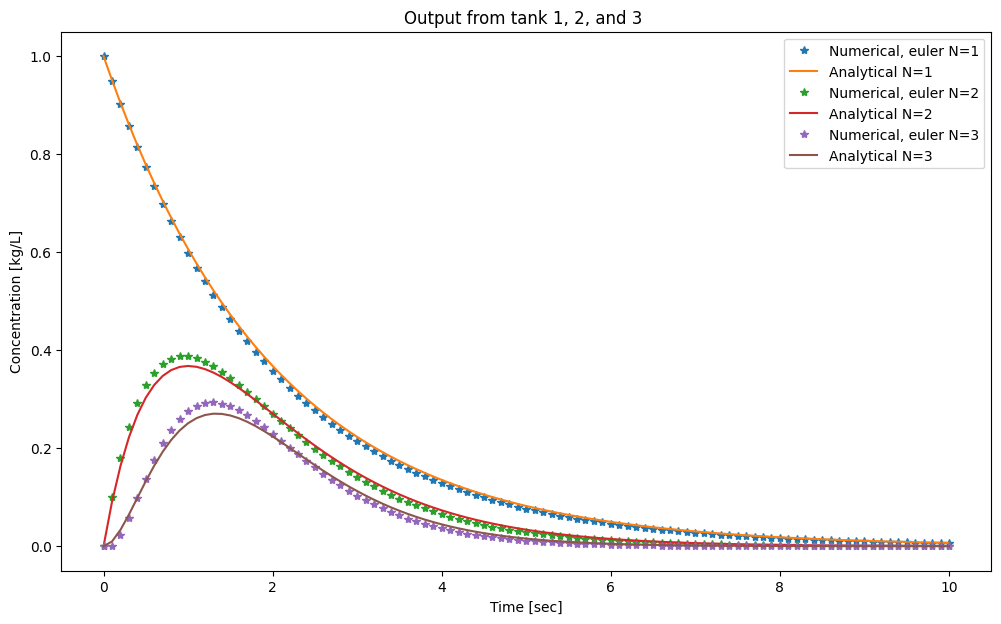

In [2]:
Stirred(N=1,method='euler').test_implementation()
Stirred(N=2,method='euler').test_implementation()
Stirred(N=3,method='euler').test_implementation()

Runge-Kutta 2nd order

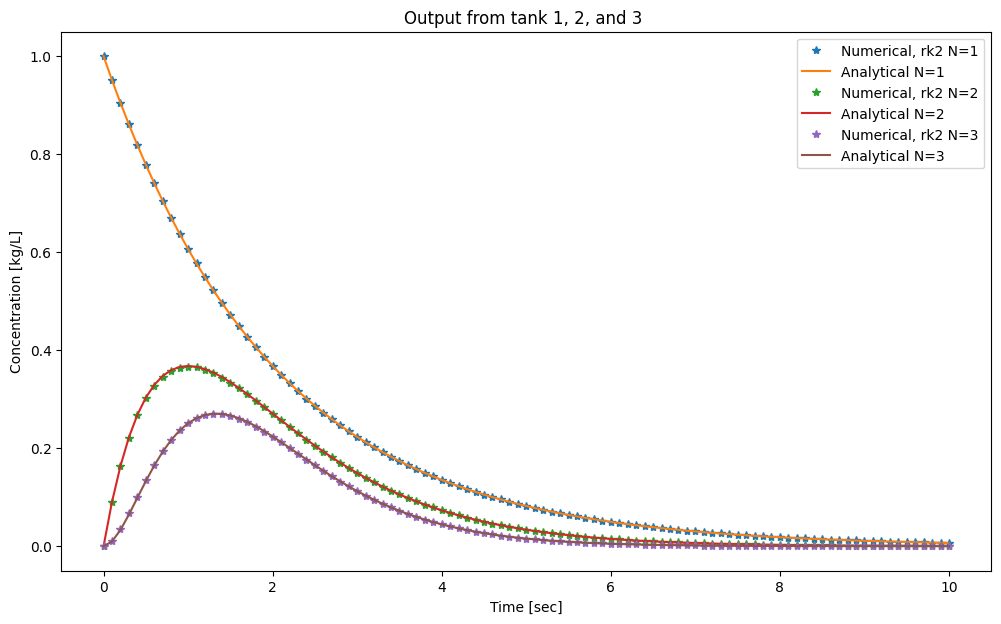

In [3]:
Stirred(N=1,method='rk2').test_implementation()
Stirred(N=2,method='rk2').test_implementation()
Stirred(N=3,method='rk2').test_implementation()

Runge-Kutta 4th order

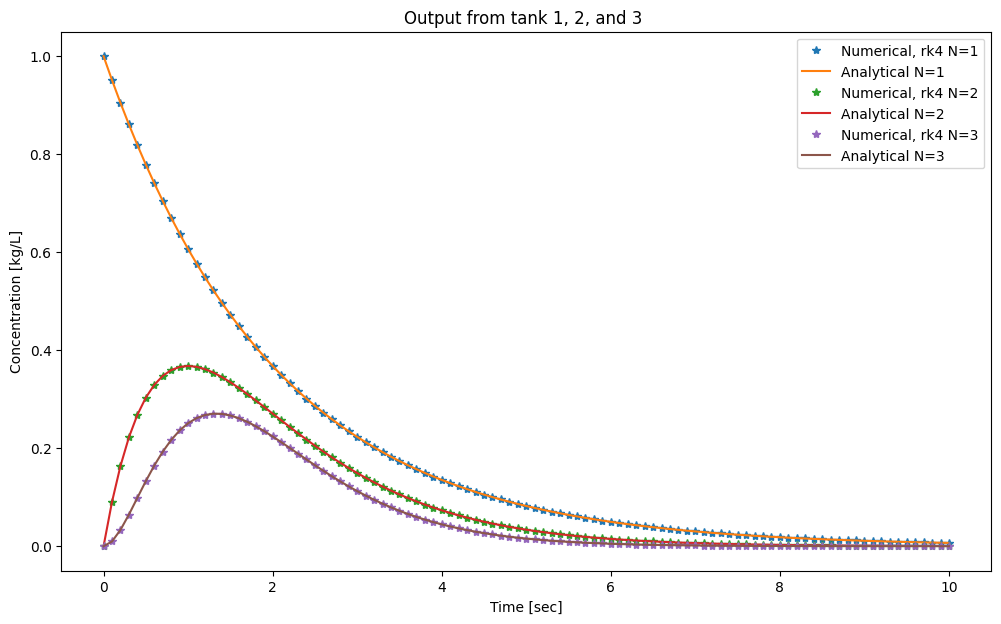

In [4]:
Stirred(N=1,method='rk4').test_implementation()
Stirred(N=2,method='rk4').test_implementation()
Stirred(N=3,method='rk4').test_implementation()

### Part 3

With $N=3$, the numerical error at $t=1$ is displayed below in text and plot format.

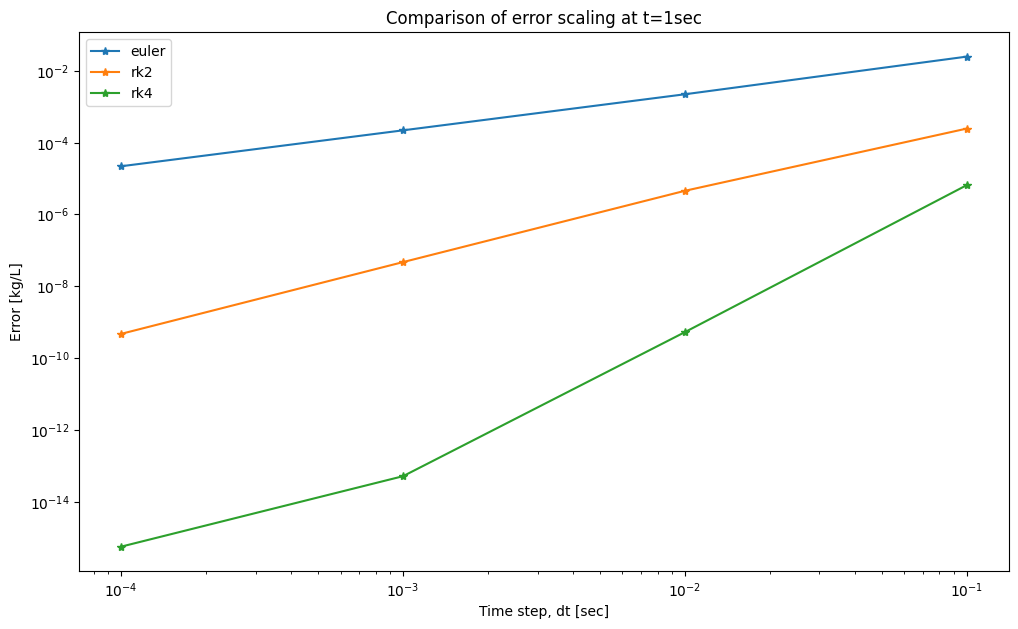

In [5]:
Stirred(N=3,method='euler').error_scaling()
Stirred(N=3,method='rk2').error_scaling()
Stirred(N=3,method='rk4').error_scaling()

The result above is as expected with the calculation error of each method scaling according to their respective orders to **dt**. We see the curve flattening for **rk4** while going from $10^{-3}$ to $10^{-4}$. As we know we approach machine error at approx $10^{-16}$, this result is also to be expected.

## Exercise 2
### Part 1 

The flowrate through the aorta is calculated using ([9](#eq)) and input which is provided by the exercise.

$$
\begin{equation}
q=\frac{M_{inj}}{\int_0^\infty C_{out}(t) \,dt}
\tag{9}
\end{equation}$$

While: 

$M_{\text{inj}}=83.\bar{3}g$

Dataset: Healthy_rect_1s.csv

In [6]:
Stirred().flowrate(M_inj=83.33, file='Healthy_rect_1s')

Calculated flow rate from Healthy_rect_1s is 5.006 L/min


### Part 2

All injection protocols were implemented and can be fed into the solver. The protocols are part of the **c_inj**-function inside the class.

### Part 3

The ODE solver is used to find the effluent concentration of the last mixing tank. Given:

$C_i(0)=0,i=0,...,N-1$

$C_{\text{inj}}\rightarrow \text{Rectangular}$

In [7]:
N = 10
tau = 2

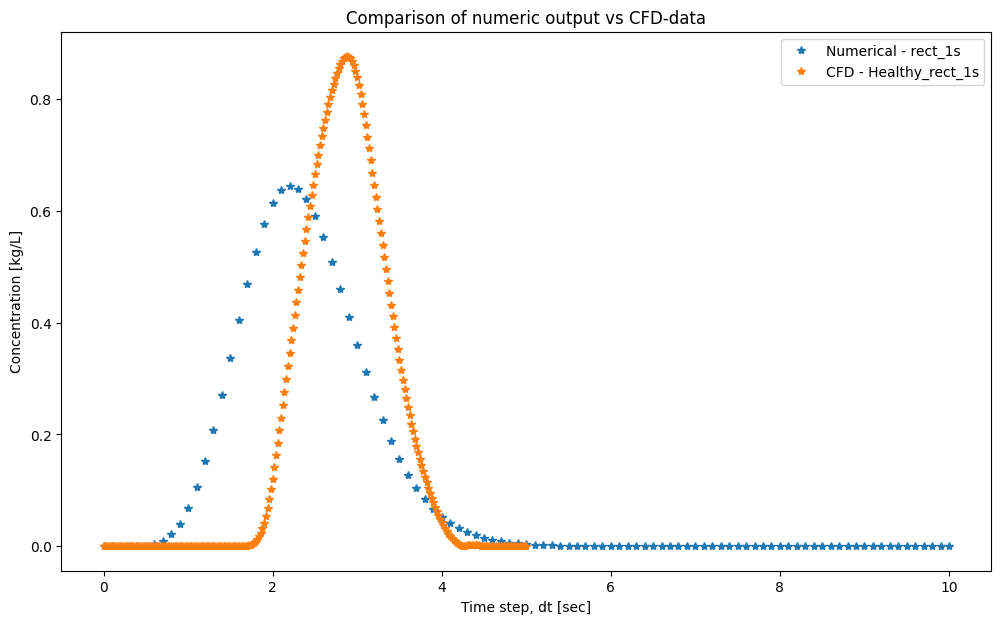

In [8]:
Stirred(N=N, q=5, V_tot=tau*(5/60), dt=0.1,method='rk4', inj_prot='rect_1s').comparison_plot(file='Healthy_rect_1s')

For the values of tau and N given above the curves are not expected to match in this plot.

### Part 4

Through arbitrary testing, $N=31$ was found to be the best stable fit. At lower values of N, the fit is less accurate and at higher values of N the solver seems to break down - where the solution completely changes in the form. It is not known exactly what makes the model break.

Curve matching was then performed by running function, "Optimize_tau".

The function works as follows:
1. Calculates total square difference between data and modeled points for different values of tau.
2. Calculates the derivative of this array / function.
3. Locates the root of the derivative by using bisection method.
4. As a final step in the bisection function the zero point is found by interpolating between the two points in the given array that are closest to zero on each side.

As before it was done iteratively, starting with large steps over a large distance, and then taking smaller steps within a smaller space to save computation time.

**It can be found in line 328.**

In [9]:
N=31

In [10]:
Stirred(N=N, tau_min=1, tau_max=3, dtau=0.1, method='rk4').Optimize_tau(condition='Healthy')

Curve fits best at tau = 2.372


Based on result above the tau range and step size are focused in next iteration:

In [11]:
Stirred(N=N, tau_min=2.3, tau_max=2.5, dtau=0.01, method='rk4').Optimize_tau(condition='Healthy')

Curve fits best at tau = 2.416


Iterating is performed one more time for increased accuracy:

In [12]:
Stirred(N=N, tau_min=2.36, tau_max=2.39, dtau=0.001, method='rk4').Optimize_tau(condition='Healthy')

false starting point
Curve fits best at tau = 2.419


In [13]:
tau = 2.38

To visualy check the result, the comparison function is run while using result from tau optimization function as input.

$V_{\text{tot}}=2.370*(5/60)=0.1975l$

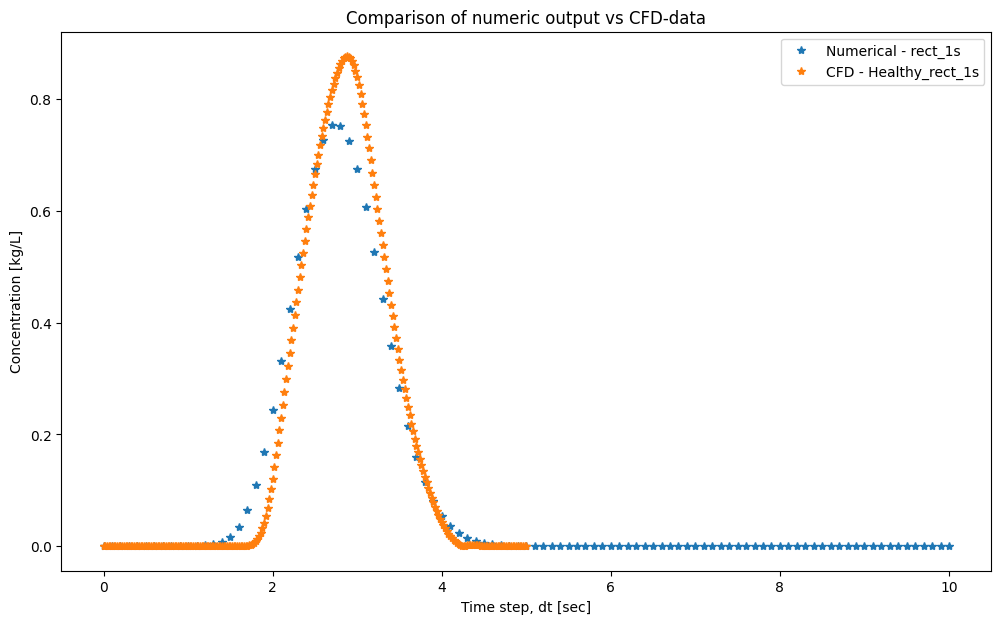

In [14]:
Stirred(N=N, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='rect_1s').comparison_plot(file='Healthy_rect_1s')

### Part 5

After having calibrated V_tot based on rect_1s injection data, the output of other injection protocols can be forecasted. Forecasts are done for different protocols versus corresponding CFD-data follows.

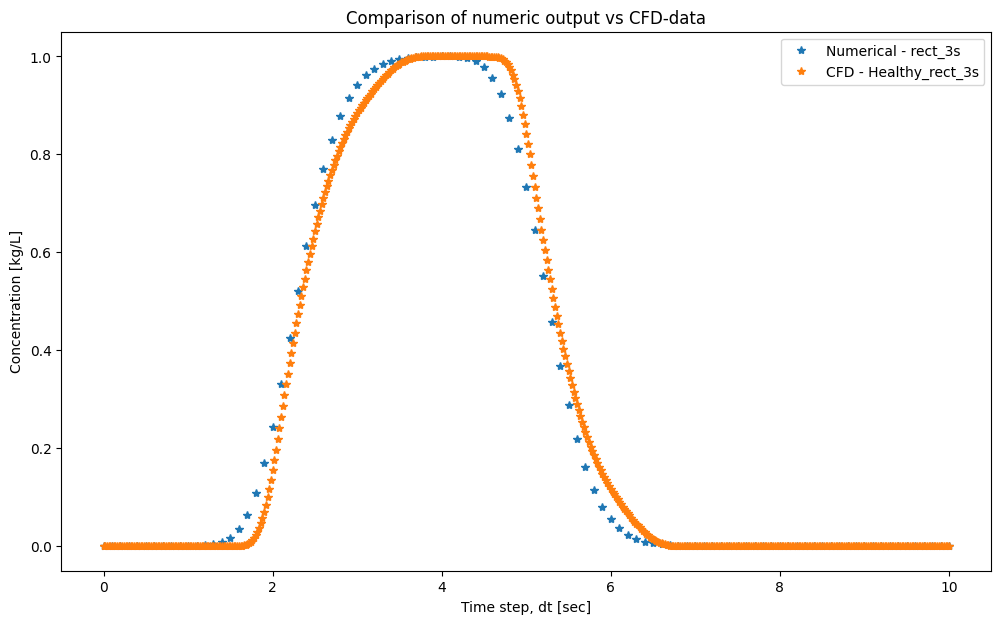

In [15]:
Stirred(N=N, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='rect_3s').comparison_plot(file='Healthy_rect_3s')

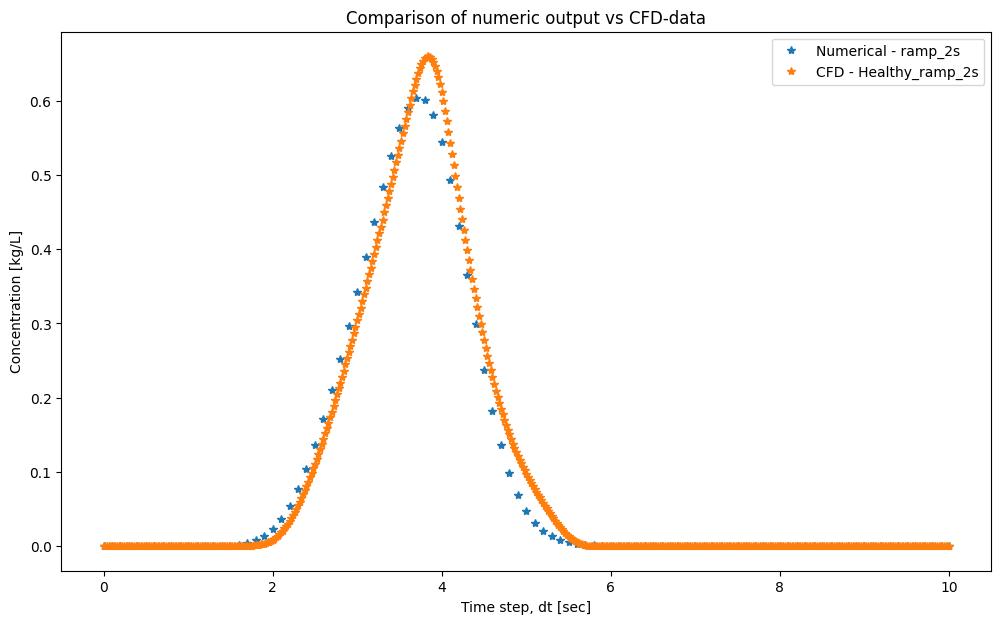

In [16]:
Stirred(N=N, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='ramp_2s').comparison_plot(file='Healthy_ramp_2s')

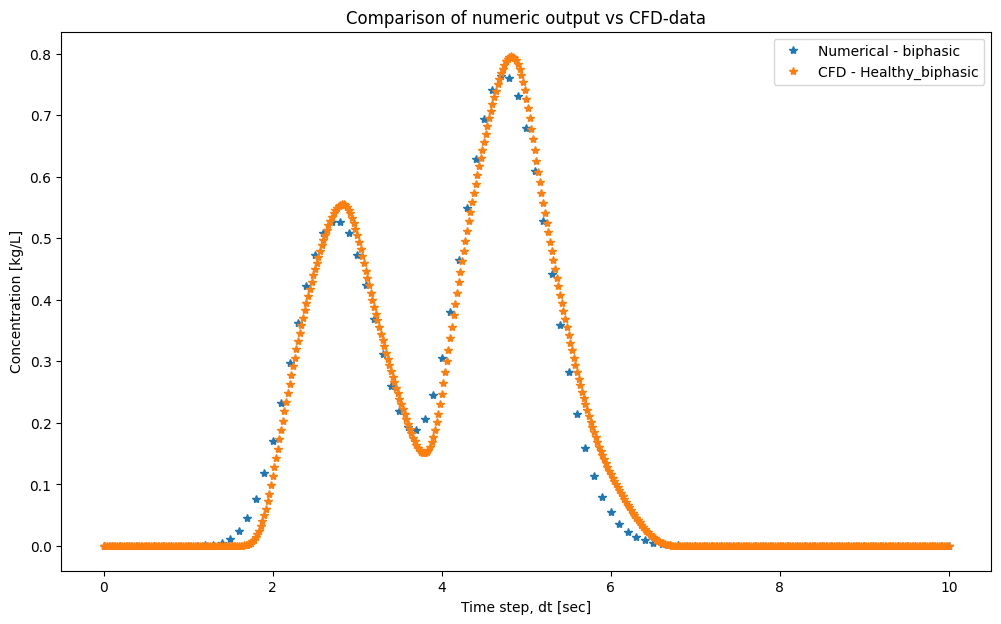

In [17]:
Stirred(N=N, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='biphasic').comparison_plot(file='Healthy_biphasic')

In general the forecast fit the CFD-data quite well, even if it is not perfect. It seems that this level of accuracy would be acceptable in a practical lab setting.

The biggest deviation can be seen for the biphasic injection protocol. In the comparison plot it seems like the model is injecting for a little bit longer compared to CFD-data. From the input sheet, the first injection phase was interpreted as $0.7 kg/l$ and lasting 1 second. This interpretation is supported by observing that the output amount of the Healthy_biphasic data file is 1.7 times that of the Healthy_rect_1s file. 

To investigate this suspicion a new injection protocol, "biphasic_2" was created. This protocol is identical to the first except it stops the first phase after 0.9 seconds rather than 1. As seen below the fit is better. The most likely explanation is that the model somehow doesn't work as well for the biphasic flow, or rather that the shortcomings of the model are exposed particularly well through the biphasic injection pattern. 


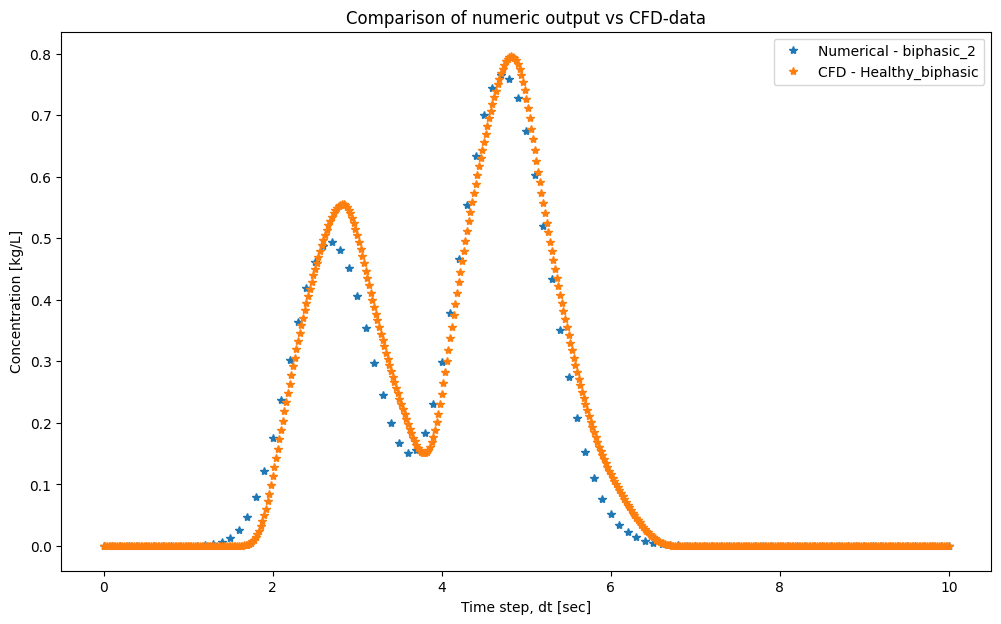

In [18]:
Stirred(N=31, q=5, V_tot=2.370*(5/60), method='rk4', model='basic', inj_prot='biphasic_2').comparison_plot(file='Healthy_biphasic')

## Exercise 3
### Part 1

Basic model was calibrated to fit ameurysm cases from CFD-simulation. The same process was followed as for the healthy aorta case.

In [19]:
N = 31

Stirred(N=N, tau_min=1, tau_max=3, dtau=0.1, method='rk4').Optimize_tau(condition='Aneurysm')

Curve fits best at tau = 2.442


In [20]:
Stirred(N=N, tau_min=2.3, tau_max=2.5, dtau=0.01, method='rk4').Optimize_tau(condition='Aneurysm')

Curve fits best at tau = 2.485


In [21]:
Stirred(N=N, tau_min=2.43, tau_max=2.45, dtau=0.001, method='rk4').Optimize_tau(condition='Aneurysm')

false starting point
Curve fits best at tau = 2.488


In [22]:
tau = 2.440

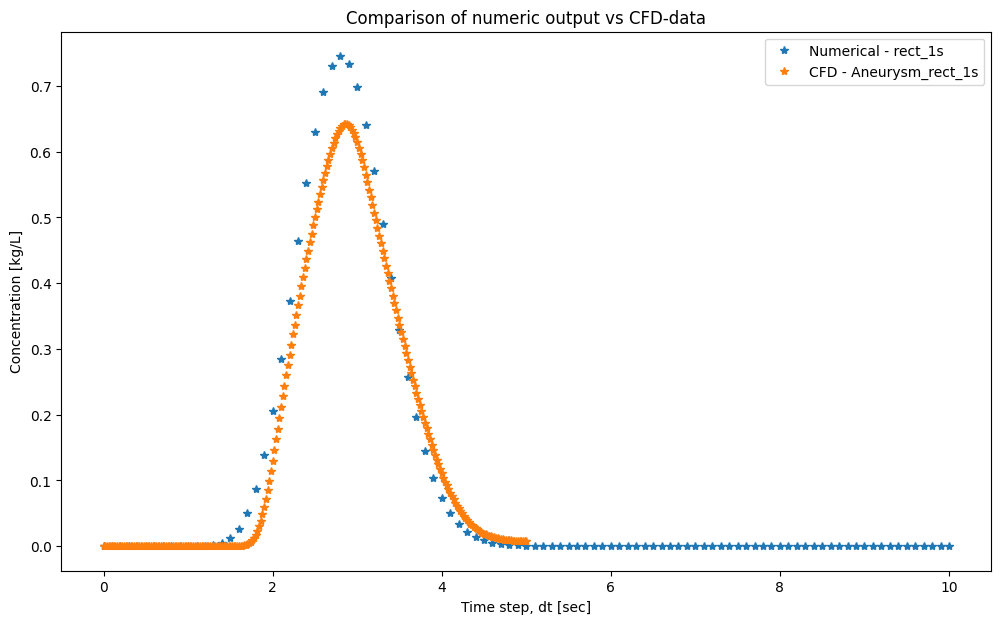

In [23]:
Stirred(N=31, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='rect_1s').comparison_plot(file='Aneurysm_rect_1s')

**N** was determined by experimentation and subjectively decided to have best match at same value as for healthy case. By decreasing N the peak concentration in the last tank will be lowered at the expence of stretching the graph in time direction. By choosing a higher N, the timing is judged to be more important than matching the peak concentration.

**Tau** was determined through the same iterative running of the **Optimize_tau**-function. 

The most striking feature of the comparison graph above is that the total amount of dye exiting the system seems to be significantly more in the modeled case compared to CFD-data. Intuitively this may make sense since the aneurism holds back some dye for a longer time before it is flushed from the system.

While comparing CFD-data from the healthy- and aneurysm cases for rect_1s, it was seen that 100% of the injected mass had left the system after 5 seconds for the healthy model, compared to 85.6% for aneurysm case. The area between the graphs has not been calculated, but it seems that 15% would go a long way to explain that deficit.

### Part 2

The same three injection protocols were used for forecasting as for the healthy case:

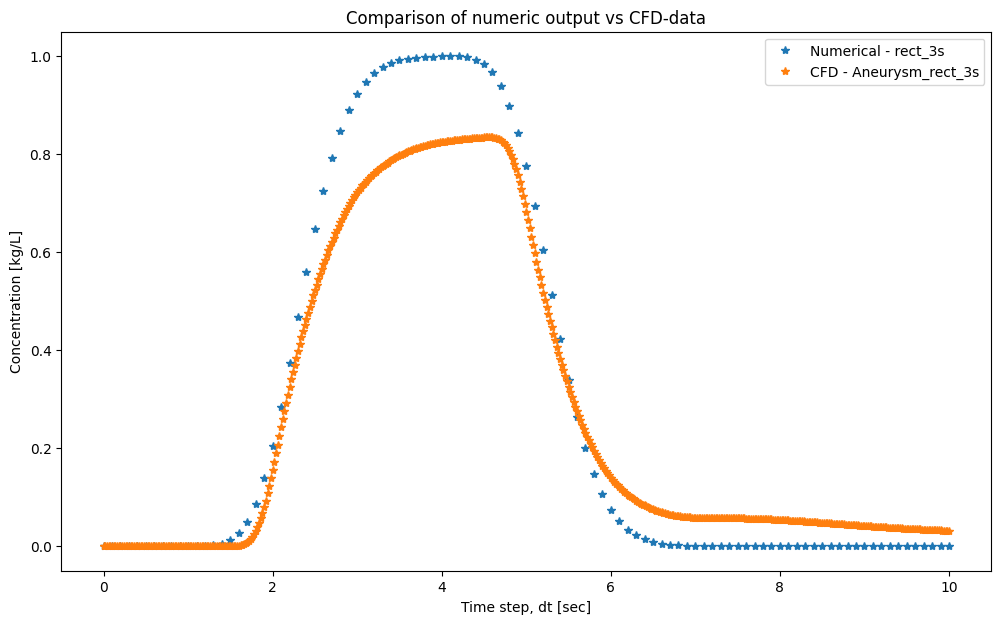

In [24]:
Stirred(N=N, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='rect_3s').comparison_plot(file='Aneurysm_rect_3s')


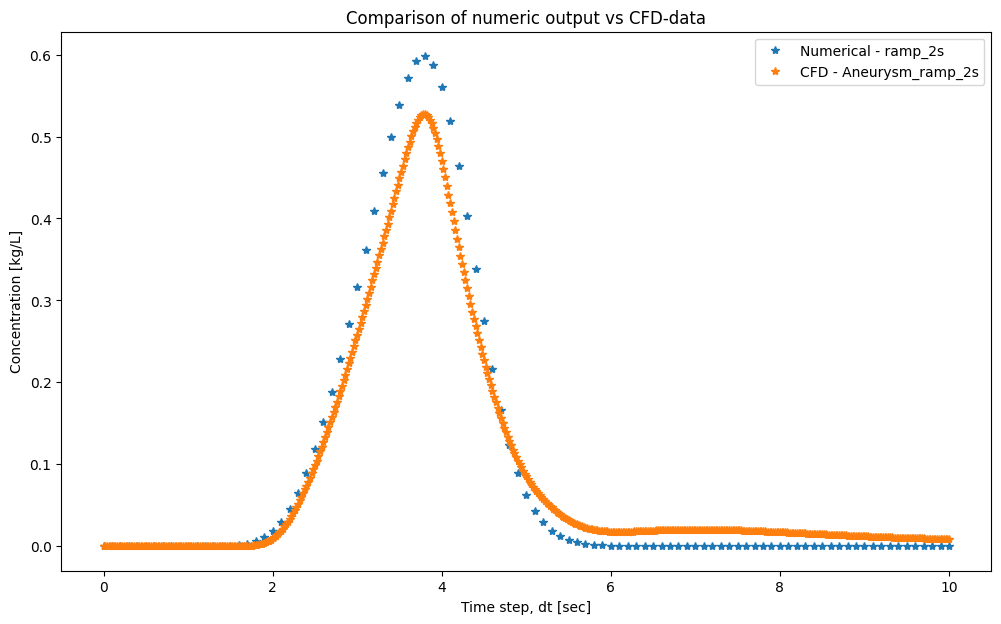

In [25]:
Stirred(N=N, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='ramp_2s').comparison_plot(file='Aneurysm_ramp_2s')

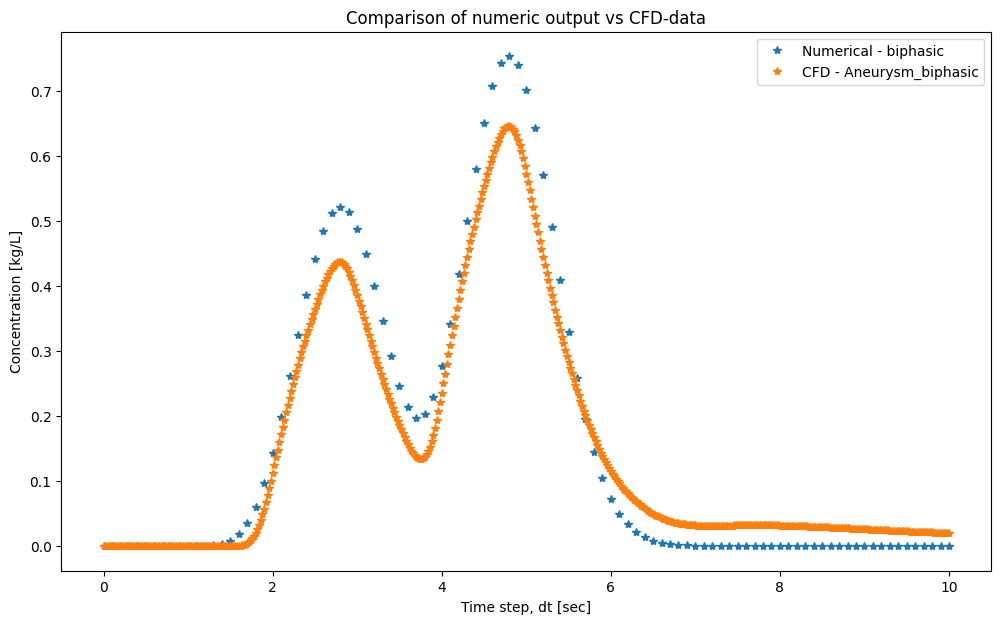

In [26]:
Stirred(N=N, q=5, V_tot=tau*(5/60), method='rk4', model='basic', inj_prot='biphasic').comparison_plot(file='Aneurysm_biphasic')

The forecasts that were generated are not good fits, but still no worse than the calibrated rect_1s. It seems clear from these plots that something happens in the "real" CFD-case that is not adequately replicated by the model.

At least part of the misfit can be explained by the inability of the model to retain dye, as discovered while calibrating the model. In the preceding three plots the effect is more clearly observable as the model has higher peak concentrations leaving the system, but returns to zero quickly, while CFD-data shows a long tail and not reaching zero within 10 seconds.

By tallying the CFD files it could be seen that for all Aneurysm cases the system retains approx 10-11% of the dye at 10 seconds.

### Part 3

In both healthy and aneurysm case N was manually calibrated to the same number. The following tau was found to be slightly higher for the aneurysm case, compared to the healthy case. The slight increase in tau / V_tot serves to delay the peak concentration output of the system by a small amount. This makes sense as the aneurysm does not decrease the "straight" line through the system much. 

The main effect of the aneurysm is expected to be that of holding back a portion of the dye for a longer period of time. By manipulating N and tau, there is no way to induce this effect in the basic model, so it makes sense for the "optimal" solution for the aneurysm case to be similar to the healthy case while constrained by the basic model.

### Part 4

CSTR approach in comparison to CFD / Navier Stokes equations has some advantages and disadvantages which are discussed in the following:

Strengths;

1. Low computational time: Implementation of CSTR approach takes lower time in comparison to CFD models. One reason is due to some simplifications that are considered in CSTR model. 
2. Simple implementation: Due to some simplification, implementation of CSTR approach is much easier than implementing a CFD model. 

Weaknesses;

1. Less accurate: Again considering some simplification, make the result deviate from the accurate result which can be achieved by CFD model so the accuracy of CSTR approach is less than CFD model.

## Exercise 4 (Optional)

### Part 1

An extended model was created, to be able to replicate the effect of the aneurysm case.

For the basic model, the right hand side was calculated using a single vector operation. The extended model split this process into 5 steps:
1. Vectorized calculation for all tanks preceding the tank that is connected to the aneurysm (same as for basic model).
2. Single calculation for concentration in tank connected to aneurysm.
3. Single calculation for concentration in the aneurysm itself.
4. Single calculation for first tank following tank connected to aneurysm.*
5. Vectorized calculation for all tanks following the tank that is connected to the aneurysm (same as for basic model).

*This step is necessary because of the discontinuity created by storing the concentration of the aneurysm inside the vector containing the concentrations for all the "standard" tanks.
Note that since the data for the aneurysm is stored inside the rhs / y_old vectors, the real N for the extended model is one less than the input N. This is reflected in the coding of the extended model.

By default the model puts the aneurysm at the fourth last tank. This can be changed through parameter input **N_A** (default = -4) into the **Stirred** class. Some testing was performed to see the effect of changing the placement of the aneurysm. A significant effect could not be observed.

For parameter tuning,  and $V_{\text{tot}}$ were taken from previous optimization. With the philosophy of the extended in mind, these numbers should not be different between the models.
Experimentally found volume of aneurysm, $V_A$ and diffusion constant $D_A$.

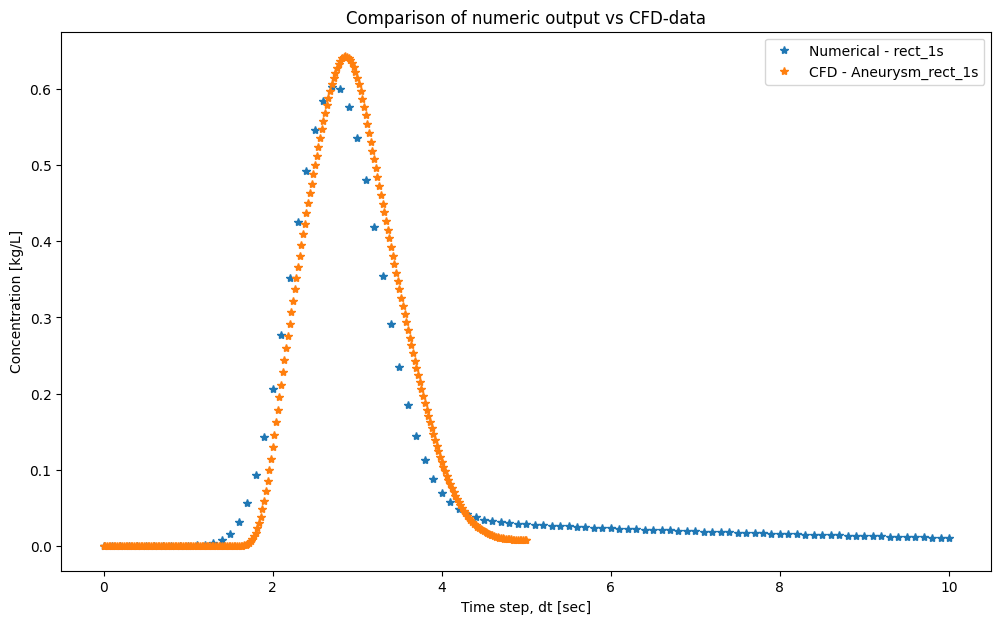

In [27]:
Stirred(N=32, V_A=0.1, D_A=0.3, q=5, V_tot=0.1975, method='rk4', model='extended', inj_prot='rect_1s').comparison_plot(file='Aneurysm_rect_1s')

### Part 2

As shown above, and as explained above, the optimal values are 

$N=31$, $V_A=0.1$, $D_A=0.3$, $q=5$, $V_{\text{tot}}=0.2$.

As for the basic model predictions for other injection protocols can be made.

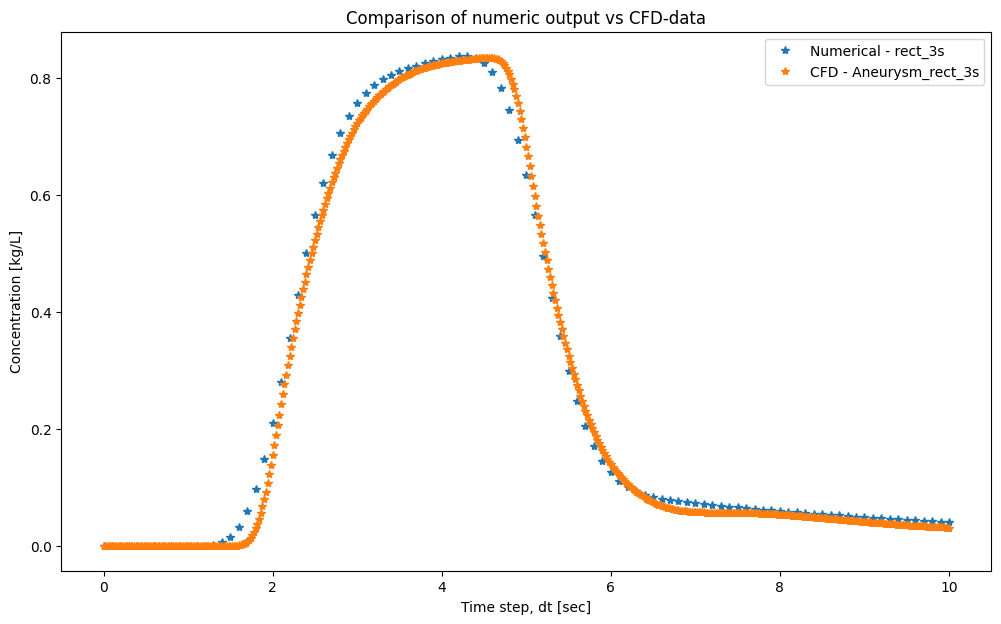

In [28]:
Stirred(N=31, V_A=0.1, D_A=0.3, q=5, V_tot=0.1975, method='rk4', model='extended', inj_prot='rect_3s').comparison_plot(file='Aneurysm_rect_3s')

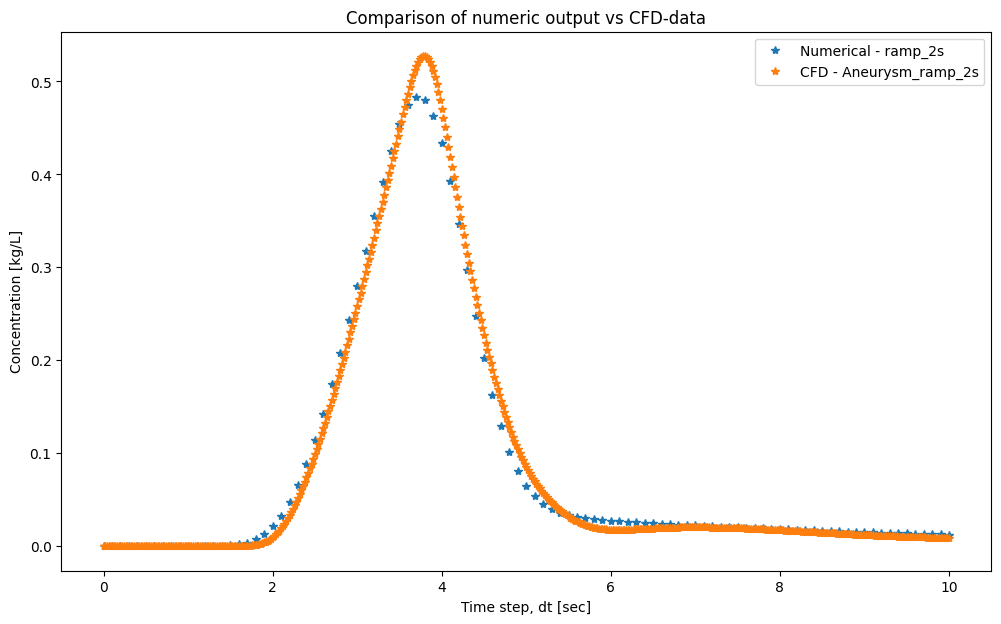

In [29]:
Stirred(N=31, V_A=0.1, D_A=0.3, q=5, V_tot=0.1975, method='rk4', model='extended', inj_prot='ramp_2s').comparison_plot(file='Aneurysm_ramp_2s')


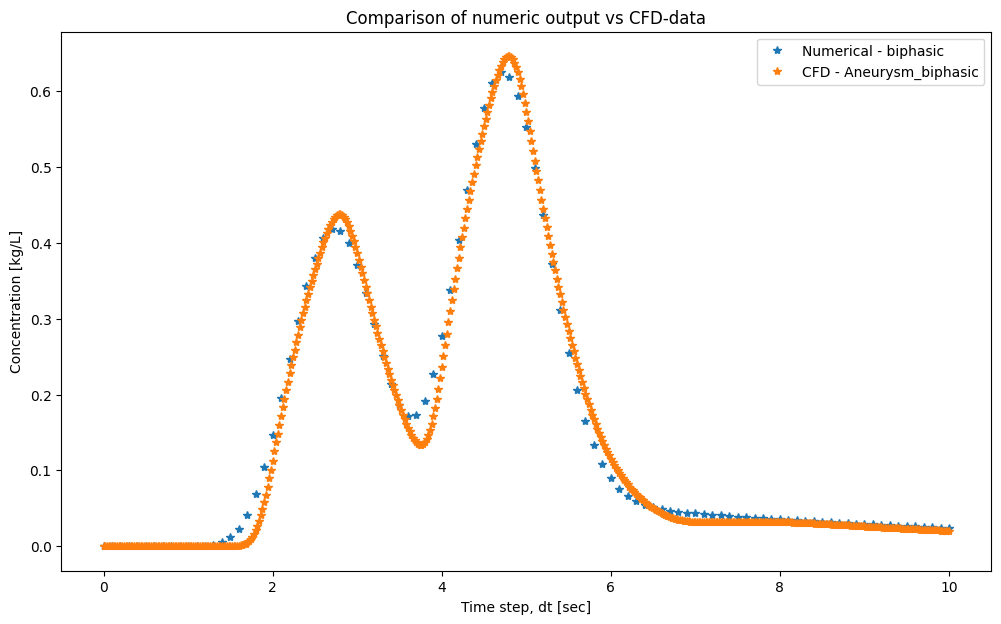

In [30]:
Stirred(N=31, V_A=0.1, D_A=0.3, q=5, V_tot=0.1975, method='rk4', model='extended', inj_prot='biphasic').comparison_plot(file='Aneurysm_biphasic')


The most striking feature for the extended model forecasts is the ability to replicate the "tail"-behavior of the CFD-data.
Second we can see the same feature as for the basic model in the biphasic injection pattern. Since this feature is the same between the models, at least it is not an error introduced by the extended code.
Third interesting feature is that compared to other CFD-aneurysm outputs, the **rect_1s** curve does not express the same tail-behavior as the others. To investigate we will plot **ramp_1s** to see if the missing tail is related to the short pulse of **rect_1s** compared to other protocols.

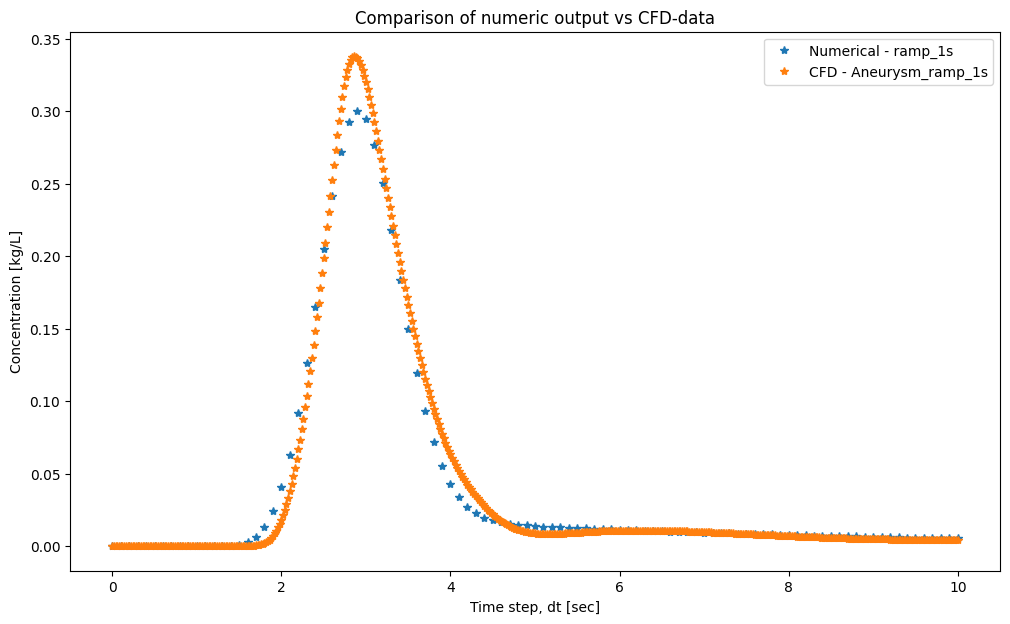

In [31]:
Stirred(N=32, V_A=0.1, D_A=0.3, q=5, V_tot=0.1975, method='rk4', model='extended', inj_prot='ramp_1s').comparison_plot(file='Aneurysm_ramp_1s')


For **ramp_1s** we observe a similar "tail" to the bulk of other injection protocols, leaving **rect_1s** as an outlier in this regard. In addition we can see that the forecast for this curve is slightly skewed towards the right. To get a better match for this specific plot V_tot could be lowerered, but that would not mean that the overall predicting performace of the function would improve.

# Conclusion

The main motivation for this project was being able to tell whether a certain stretch of a blood vessel is healthy, or if there is an abnormal bulge present.

Below is a plot displaying the final performance of the model, comparing healthy to abnormal output from the blood vessel. In both cases the extended model is used. To model a healthy system the diffusion constant is set to zero, effectively cutting off communication to the "bulge", as if it is not there.

*(A "bulge" not connected to a blood vessel can still present a health concern, but that will be left for another project.)*

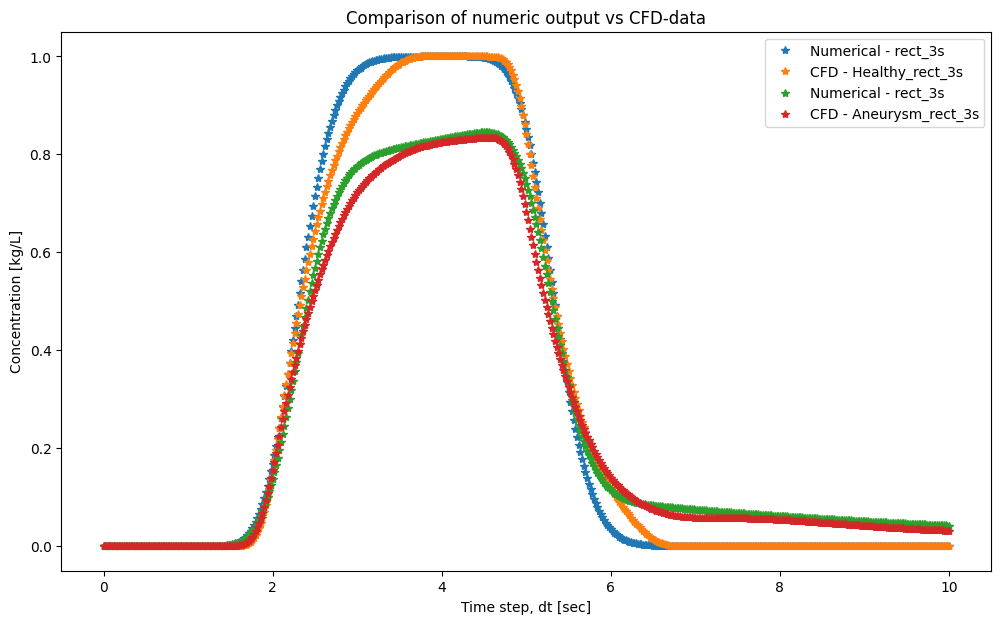

In [32]:
Stirred(N=50, dt=0.02, V_A=0.1, D_A=0, q=5, V_tot=0.1975, method='rk4', model='extended', inj_prot='rect_3s').comparison_plot(file='Healthy_rect_3s')
Stirred(N=50, dt=0.02, V_A=0.1, D_A=0.3, q=5, V_tot=0.1975, method='rk4', model='extended', inj_prot='rect_3s').comparison_plot(file='Aneurysm_rect_3s')

In general the forecasting for the various different injection protocols works as intended. The model is able to replicate the results of the CFD simulation quite well. In a way it can be argued that the 

In a lab setting the "tail" portion of the curve seems to be the most reliable feature to determine whether an aneurysm is present. It would be very interesting to continue this study with clinical data. It can be speculated that even a healthy vessel would have a certain "tail" and it might be more difficult to interpret a clear "signal" through all the noice of the real world.

Regarding error analysis, the clear benefit of higher order solving methods has been shown. In the specific application of this project, we can see that the anomalies we are looking for are at a much higher order of magnitude than the error of any of the solving methods. However, since the slight increase in computing power required for the more accurate solution, it was chosen to stick with the Runge Kutta 4 solver as a baseline. 

In the real world, the need for higher accuracy would arise only if the aneurysm was sufficiently small, but in this case it may not be of concern.

# Personal reflection 

Andreas:
1. This assignment proved to be somewhat more difficult to divide into tasks for everyone to do separately, giving  everyone a responsibility. As a result, all of us made functional answers for the whole of exercise 1.
2. I understood the requirements for generality and argument passing differently from how it was done in the class which ended up being used, and the extra "qualities" that I thought was required added layers of complexity to the code which made it difficult to develop in a clean/satisfying manner. It ended up fully functional. It did not end up not being used though, since the Class version was developed further with answers for the later tasks before it was done with the library and doing double work for the whole assignment felt pointless. Work was therefore continued with the class system instead.
3. Generally the results felt a bit underwhelming. I guess I had some innate expectation that a assignment would have beautiful results where we got near perfect matches on everything after some tuning. The challenging of this innate expectation might've been good for my future work and assignments though!
4. The results were nonetheless interesting and the ODE solver and then continual usage of it throughout the exercise was nice. 

Sahar:

This project was demanding for me, yet fun to work on it. All parts of the projects bring me interesting new topics to learn.
1. In exercise 1, I learned how to code an ODE function and use ODE-Solver for solving it.
2. Exercise 2 was interesting to me since we coded various injecting protocols and tuning the model by modifying effective parameters.
3. In exercise 3, we found out our basic model cannot identify aneurysm.
4. So in exercise 4, we change our basic model to extended model for identifying aneurysm.
 
During this project, there were some ambiguous for me, so I got help from Oddbjørn. Since I had no idea about it. Finally, I understood as a data scientist, when I face with challenges and topics that I have no clue about them, I can figure out them without having knowledge about that scientific topic.

Daniel:

I really felt motivated by the setting of this project. The work feels meaningful and connected to the real world. The results of a model like we have made can actually help save lives!
For me the value of this project goes beyond the technical skills we develop through solving problems and writing code (even if that is undeniably fun in itself). The teamwork within the group (and across groups) has helped me appreciate the strengths of others, and simultaneously identify that I feel like I'm in the right place. 
With everyone contributing, the product is better than I could ever have achieved by myself, so it will serve as a good reference in the future.


<a name='ref'></a>
# References

[1] - A. Hiorth, Oct 24. 2022, *Stirred (not shaken)*

[2] - A. Hiorth, Aug 19. 2022, *Modeling and Computational Engineering*

[3]-  Numpy documentation

[4]- Pandas documentation 